<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/9.3-Plot_a_Bloch_Multivector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-visualization
!pip install qiskit-ibm-provider
!pip install imgaug==0.2.5
!pip install pylatexenc

References:
* https://qiskit.org/documentation/stubs/qiskit.visualization.plot_bloch_multivector.html
* https://qiskit.org/documentation/tutorials/circuits/2_plotting_data_in_qiskit.html

In [ ]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf


#
# Loading IBM credentials
#
API_TOKEN_DIR="/content/drive/'My Drive'/'Colab Notebooks'/QC"
API_TOKEN_FILE="MY_API_TOKEN.txt"

#Mount the google drive first
from google.colab import drive
drive.mount('/content/drive')
#%cd /content/drive/'My Drive'/'Colab Notebooks'/QC
%cd $API_TOKEN_DIR

#Read the MY_API_TOKEN from file...
from qiskit_ibm_provider import IBMProvider
MY_API_TOKEN = ""
with open(API_TOKEN_FILE) as f:
  MY_API_TOKEN=f.readline()
IBMProvider.save_account(MY_API_TOKEN, overwrite=True)

mkdir: cannot create directory ‘/root/.qiskit’: File exists
[default]
circuit_drawer = mpl
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/QC


## Plot a bloch multivector


### Using qiskit.visualization.plot_histogram

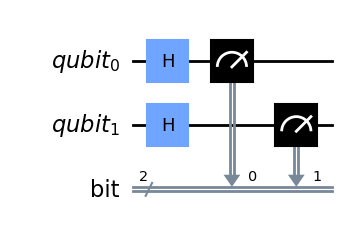

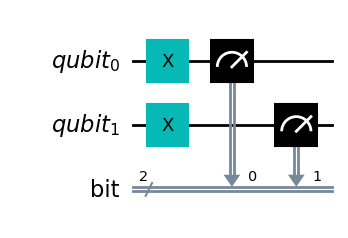

[{'01': 2525, '10': 2494, '00': 2524, '11': 2457}, {'11': 10000}]


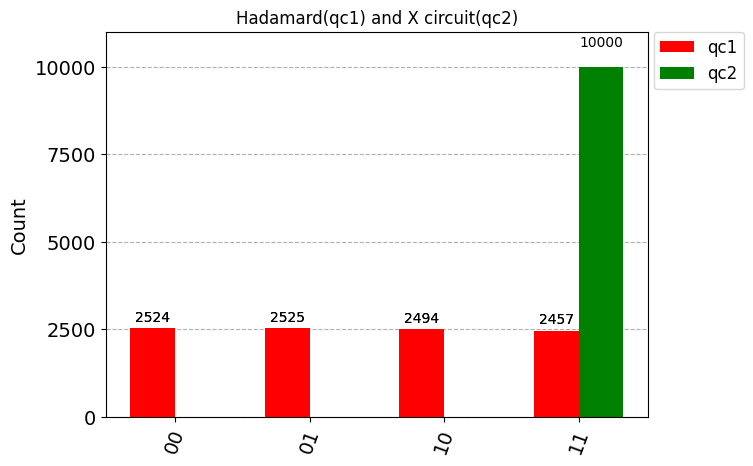

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

#Define the circuit...
qr = QuantumRegister(2, "qubit")
cr = ClassicalRegister(2, "bit")
qc1 = QuantumCircuit(qr, cr)

qc1.h(qr)
qc1.measure(qr, cr)

display(qc1.draw())

qc2= QuantumCircuit(qr, cr)
qc2.x(qr)
qc2.measure(qr,cr)
display(qc2.draw())

#Run the circuit...
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_qasm_simulator")

job = backend.run([qc1, qc2], shots=10000)
result = job.result()
count = result.get_counts()
print(count)
plot_histogram(count, figsize=(7,5), legend=["qc1", "qc2"], title="Hadamard(qc1) and X circuit(qc2)", color=["red", "green"])

Just an example to get a backend

In [ ]:
provider = IBMProvider(instance="ibm-q/open/main")
backend = provider.get_backend("ibmq_quito")